# **합성곱 신경망을 사용한 이미지 분류**

# **패션 MNIST 데이터 불러오기**

In [1]:
## 패션 MNIST를 불어옴
## 이미지를 3차원으로 변경(48000개, 사이즈 동일, 1(3차원으로 변형))
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **합성곱 신경망 만들기**

In [2]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       627,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 628,630 (2.40 MB)

 Trainable params: 628,630 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

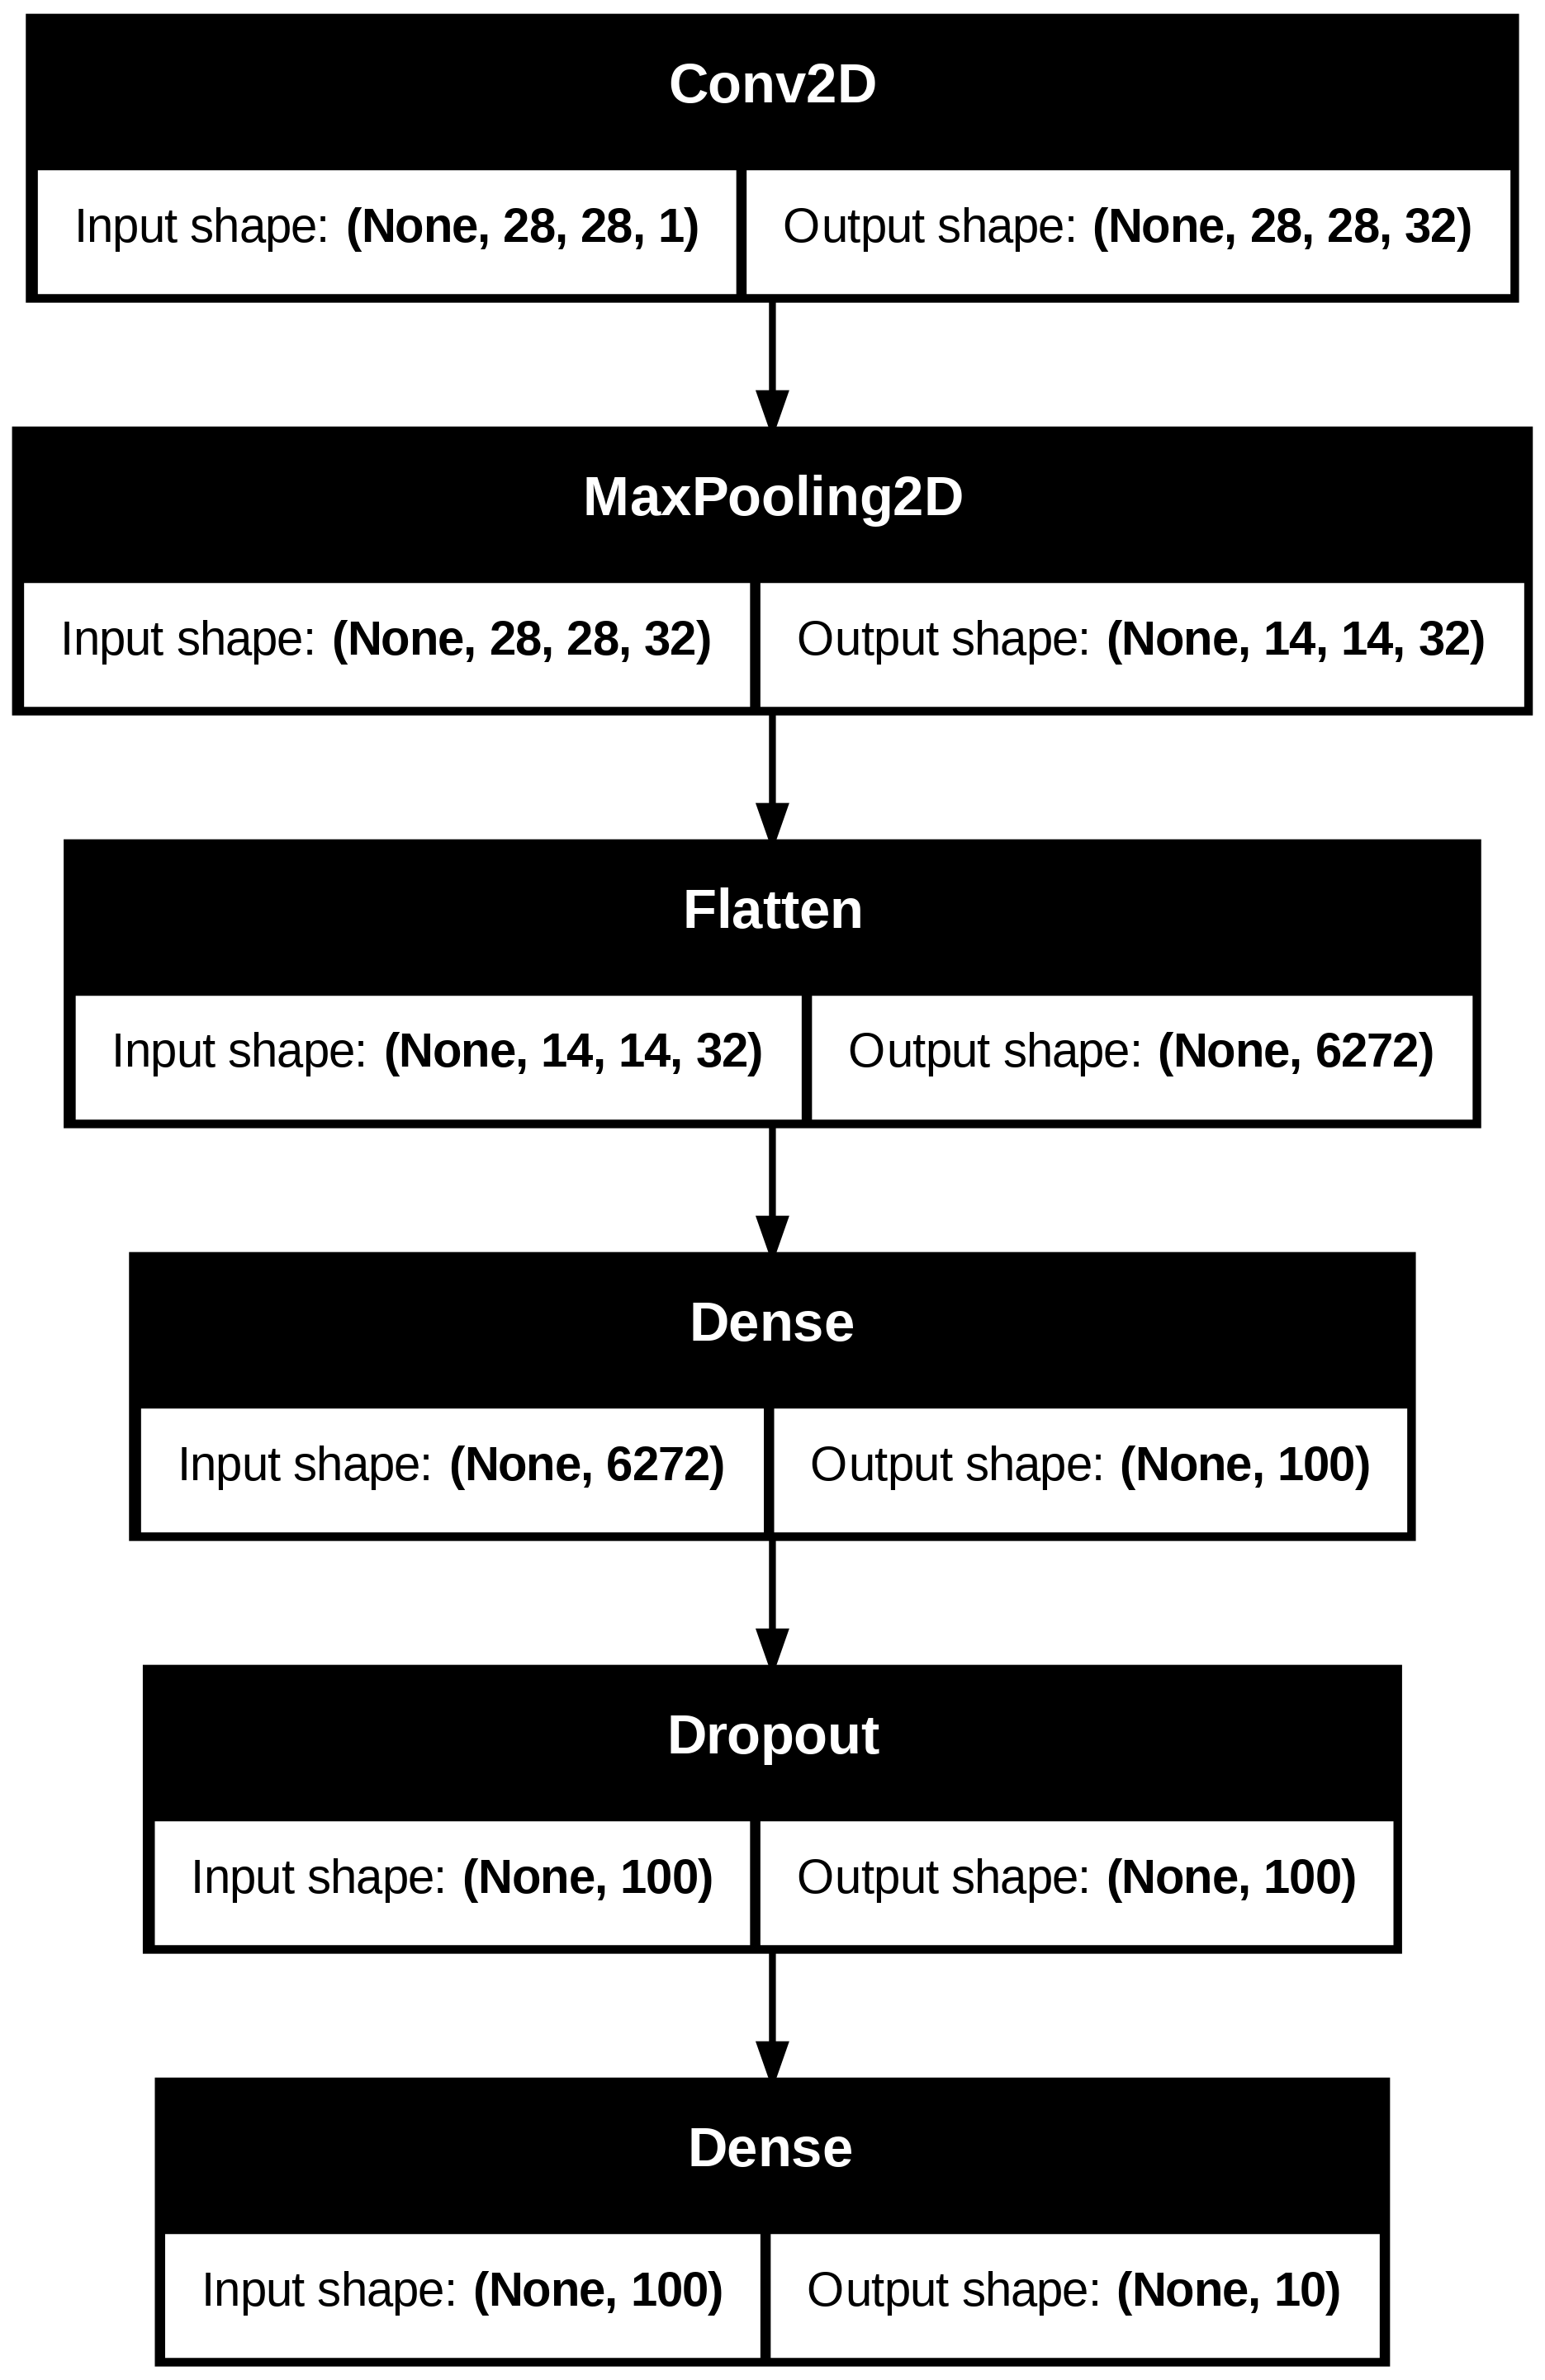

In [6]:
keras.utils.plot_model(model,show_shapes=True,to_file='cnn-architecture.png',dpi=300)

# **모델 컴파일과 훈련**

In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,
                  validation_data=(val_scaled,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7621 - loss: 0.6947

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 33s 22ms/step - accuracy: 0.7622 - loss: 0.6945 - val_accuracy: 0.8818 - val_loss: 0.3290
Epoch 2/20
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8757 - loss: 0.3505

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.8757 - loss: 0.3505 - val_accuracy: 0.8918 - val_loss: 0.2931
Epoch 3/20
1499/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8927 - loss: 0.2986

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.8927 - loss: 0.2986 - val_accuracy: 0.9033 - val_loss: 0.2591
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9037 - loss: 0.2660

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9037 - loss: 0.2660 - val_accuracy: 0.9074 - val_loss: 0.2526
Epoch 5/20
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9099 - loss: 0.2473

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9099 - loss: 0.2473 - val_accuracy: 0.9094 - val_loss: 0.2445
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9148 - loss: 0.2297

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.9148 - loss: 0.2297 - val_accuracy: 0.9104 - val_loss: 0.2489
Epoch 7/20
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9204 - loss: 0.2080

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.9204 - loss: 0.2080 - val_accuracy: 0.9137 - val_loss: 0.2377
Epoch 8/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9263 - loss: 0.1935

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9263 - loss: 0.1935 - val_accuracy: 0.9141 - val_loss: 0.2388
Epoch 9/20
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9317 - loss: 0.1799

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.9317 - loss: 0.1800 - val_accuracy: 0.9165 - val_loss: 0.2430


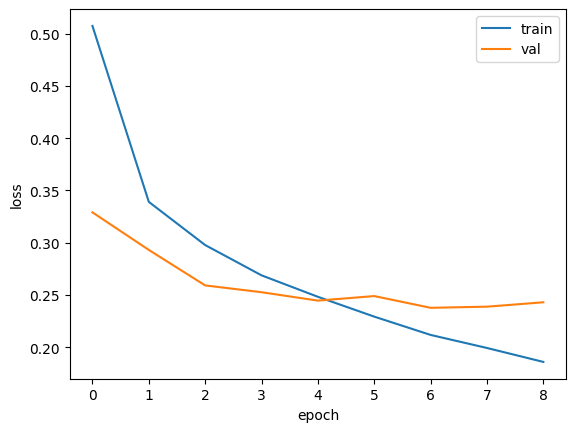

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

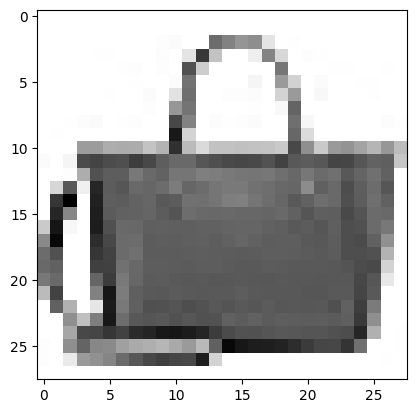

In [11]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [12]:
preds=model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
[[5.23638370e-13 2.61575810e-18 1.03627103e-16 1.84905302e-15
  1.24769605e-14 1.84851537e-13 4.37106228e-15 2.53010356e-16
  1.00000000e+00 1.68672450e-16]]


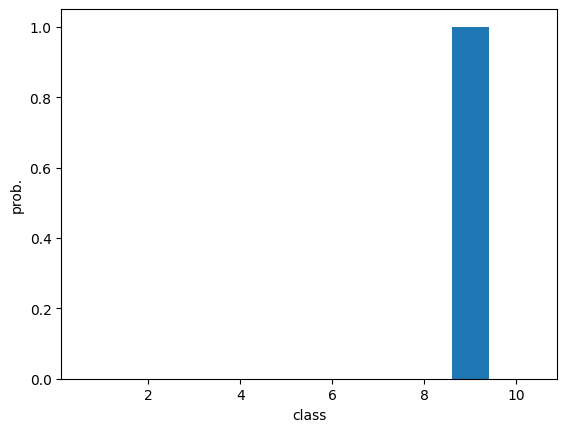

In [13]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [14]:
classes=['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [16]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [17]:
test_scaled=test_input.reshape(-1,28,28,1)/255.0

In [18]:
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9096 - loss: 0.2627


[0.2552037239074707, 0.907800018787384]

# **응용 예제**
숫자 MNIST에 대해서 Conv2D 모델을 구성하고 훈련 및 평가하고 임의이 데이터에 대해서 예측을 수행하시오. layer의 구성과 옵션은 자유롭게 변경 가능하고 주석으로 표시합니다.

In [19]:
## 케라스 데이터셋 중에서 손글씨 숫자 mnist 로드
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [20]:
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [30]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       627,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 628,630 (2.40 MB)

 Trainable params: 628,630 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

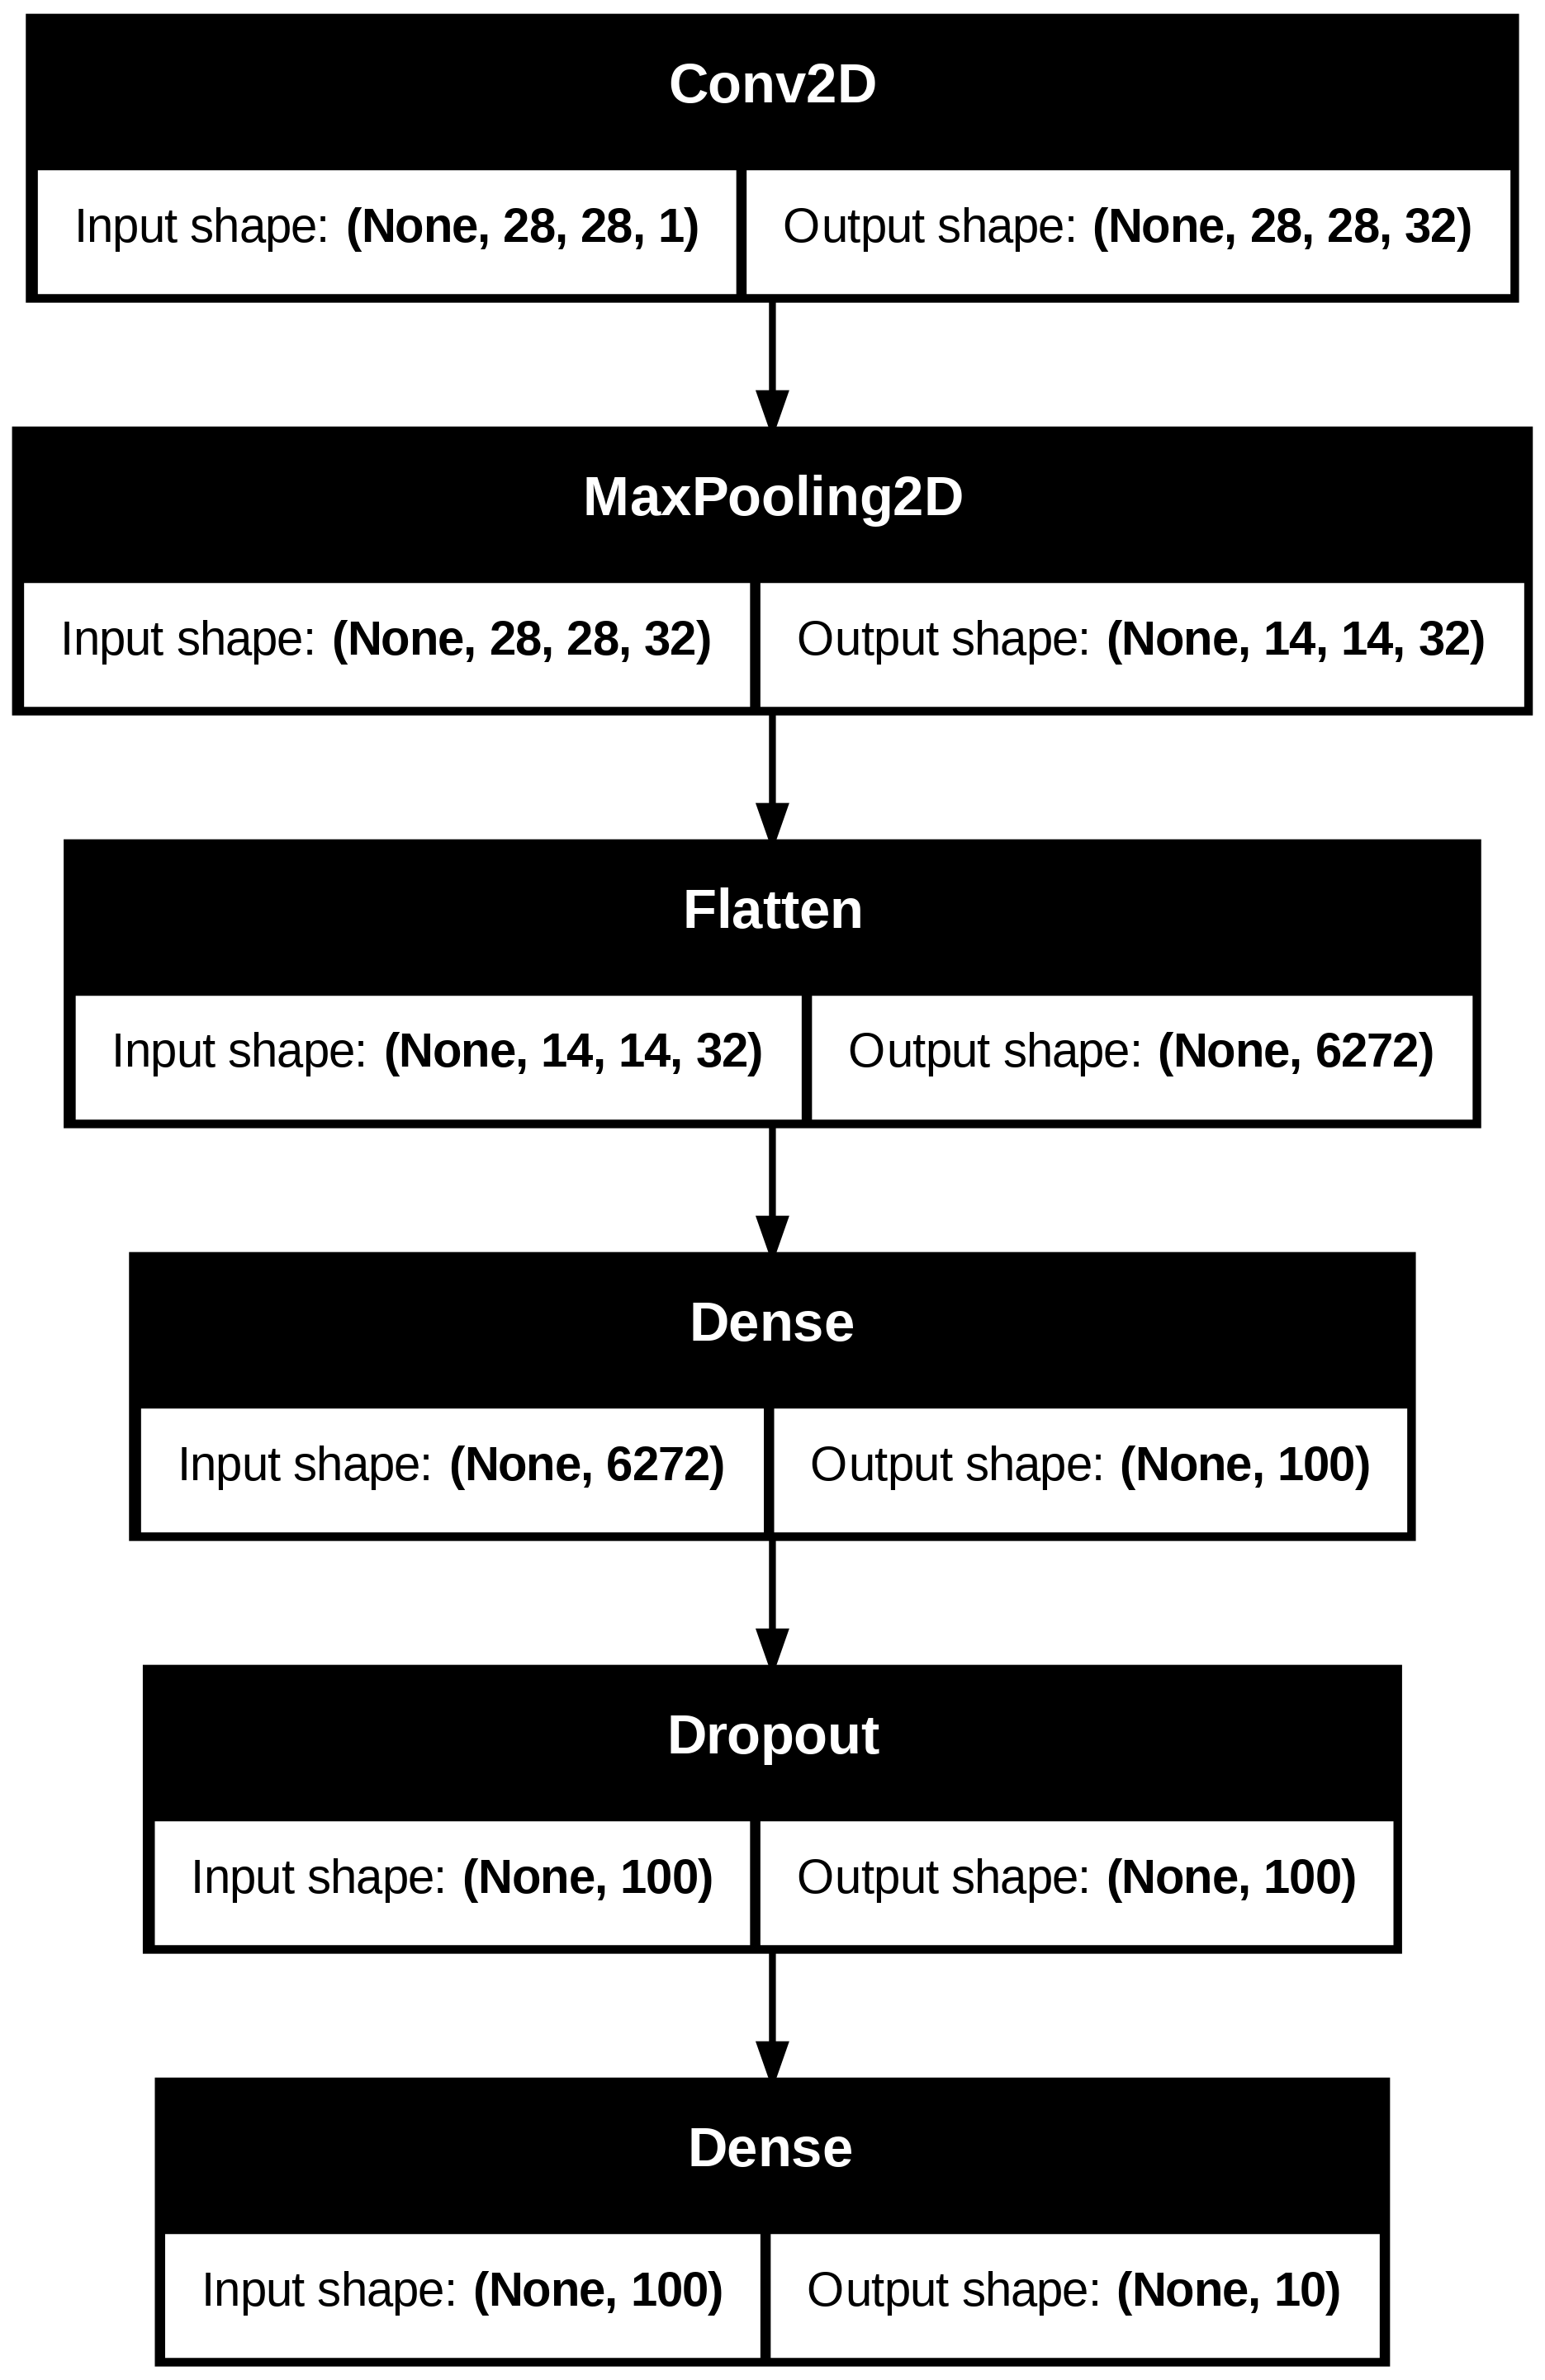

In [33]:
keras.utils.plot_model(model,show_shapes=True,to_file='cnn-architecture.png',dpi=300)

In [34]:
# 모델 재정의 부분을 제거하고, 기존 모델을 컴파일 및 훈련합니다.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,
                  validation_data=(val_scaled,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1498/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8481 - loss: 0.4982

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8482 - loss: 0.4977 - val_accuracy: 0.9752 - val_loss: 0.0838
Epoch 2/20
1497/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9673 - loss: 0.1121

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9673 - loss: 0.1121 - val_accuracy: 0.9818 - val_loss: 0.0613
Epoch 3/20
1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9760 - loss: 0.0808

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9760 - loss: 0.0808 - val_accuracy: 0.9822 - val_loss: 0.0589
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9786 - loss: 0.0667

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9786 - loss: 0.0667 - val_accuracy: 0.9848 - val_loss: 0.0476
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9822 - loss: 0.0553

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9822 - loss: 0.0553 - val_accuracy: 0.9847 - val_loss: 0.0503
Epoch 6/20
1496/1500 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9834 - loss: 0.0516

1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.9834 - loss: 0.0516 - val_accuracy: 0.9853 - val_loss: 0.0507


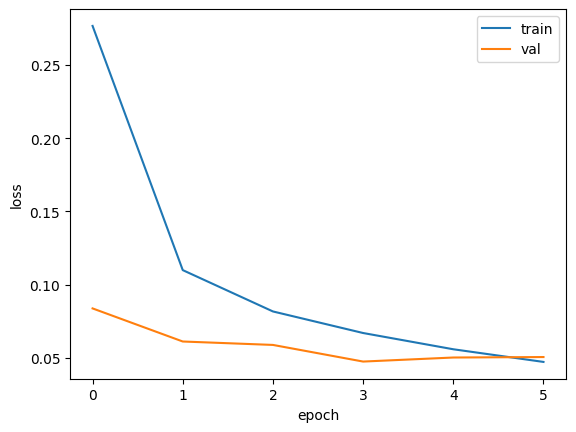

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

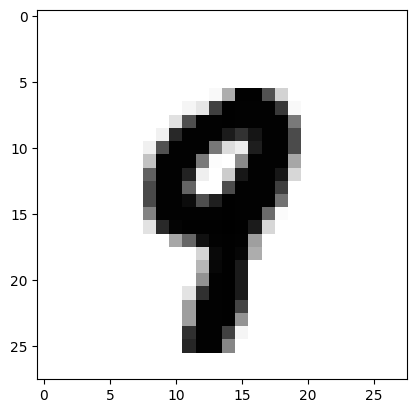

In [36]:
plt.imshow(val_scaled[3].reshape(28,28),cmap='gray_r')
plt.show()

In [37]:
preds=model.predict(val_scaled[0:3])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
[[1.9408777e-10 1.9953328e-09 2.2230129e-10 1.2698320e-07 2.1746276e-08
  1.6220642e-07 3.4503525e-11 9.9999464e-01 1.0098310e-08 5.1605484e-06]
 [9.3604942e-13 4.5204094e-09 3.2638265e-08 9.9999535e-01 3.9530865e-13
  4.3370674e-06 3.5224605e-12 7.6366630e-10 1.1637826e-07 1.9302664e-07]
 [4.0311463e-08 1.2377660e-09 5.5610440e-07 2.5058405e-06 6.8597385e-11
  4.0613901e-07 6.4791273e-08 2.5624527e-10 9.9999475e-01 1.6315227e-06]]


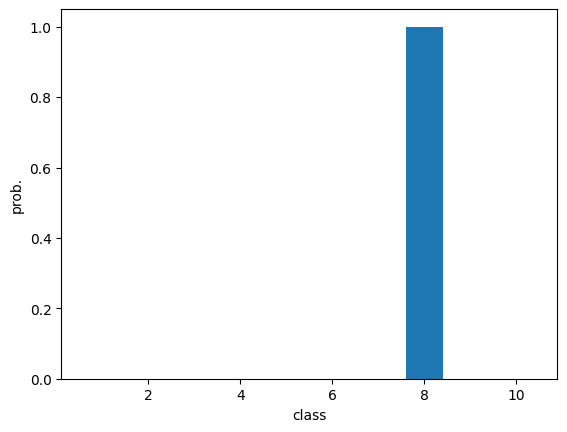

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0980 - loss: 6.9654


[6.897144317626953, 0.09740000218153]

In [38]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

np.argmax(preds)

model.evaluate(test_scaled,test_target)